In [1]:
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ncaa_detailed_scores.csv', index_col=0)

In [3]:
print(df.shape)
df.head()

(23290, 20)


,date,home_team,home_score,away_team,away_score,diff,season,is_tournament,home_score_at_home,home_defense_at_home,away_score_at_away,away_defense_at_away,home_score_total,home_defense_total,away_score_total,away_defense_total,conference_home,conference_away,home_recovery,away_recovery
0,2015-11-13,Hawaii,87,Montana State,76,11,15/16,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Big West,Big Sky,255.0,255.0
1,2015-11-13,Eastern Michigan,70,Vermont,50,20,15/16,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mid-American,America East,255.0,255.0
2,2015-11-13,Columbia,107,Kean,62,45,15/16,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ivy League,NaN,255.0,255.0
3,2015-11-13,Louisiana-Monroe,88,McMurry,43,45,15/16,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sun Belt,NaN,255.0,255.0
4,2015-11-13,Yale,70,Fairfield,57,13,15/16,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ivy League,Metro Atlantic Athletic,255.0,255.0


In [4]:
df.columns

Index(['date', 'home_team', 'home_score', 'away_team', 'away_score', 'diff',
       'season', 'is_tournament', 'home_score_at_home', 'home_defense_at_home',
       'away_score_at_away', 'away_defense_at_away', 'home_score_total',
       'home_defense_total', 'away_score_total', 'away_defense_total',
       'conference_home', 'conference_away', 'home_recovery', 'away_recovery'],
      dtype='object')

In [5]:
cat_columns = ['home_team', 'away_team', 'conference_home', 'conference_away', 'season', 'is_tournament']
drop_columns = ['date', 'home_score', 'away_score']
dep_column = ['diff']

cont_columns = [c for c in df.columns if c not in cat_columns + drop_columns + dep_column]

df = df[cat_columns + cont_columns + dep_column]

### Categorize

In [6]:
for col in cat_columns:
    df[col] = df[col].astype('category').cat.codes

In [7]:
df.head()

,home_team,away_team,conference_home,conference_away,season,is_tournament,home_score_at_home,home_defense_at_home,away_score_at_away,away_defense_at_away,home_score_total,home_defense_total,away_score_total,away_defense_total,home_recovery,away_recovery,diff
0,118,485,10,7,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.0,255.0,11
1,88,824,16,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.0,255.0,20
2,67,355,14,-1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.0,255.0,45
3,160,438,29,-1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.0,255.0,45
4,368,235,14,15,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.0,255.0,13


In [8]:
for col in cont_columns:
    df[col] = (df[col] - df[col].mean()) / df[col].std()

In [9]:
X_values = df.drop('diff', axis = 1).values
Y_values = df['diff'].values

val_pct = 0.2
cut = int(X_values.shape[0] * (1 - val_pct))

X_train = X_values[:cut]
Y_train = Y_values[:cut]
X_val = X_values[cut:]
Y_val = Y_values[cut:]

In [10]:
print(X_train.shape, Y_train.shape)

(18632, 16) (18632,)


In [11]:
model = keras.Sequential()

model.add(keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(64, activation = 'relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(32, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(16, activation = 'relu'))
model.add(keras.layers.Dense(1))

model.compile(loss='mean_squared_error', 
              #optimizer=keras.optimizers.Adam(0.1),
              optimizer = keras.optimizers.RMSprop(),
              metrics =  keras.metrics.MeanAbsoluteError()
              )

In [12]:
history = model.fit(
    X_train,
    Y_train,
    batch_size = 128,
    epochs = 250,
    validation_data = (X_val, Y_val),
    verbose = False
)

In [13]:
l,v = history.history['loss'], history.history['val_loss']

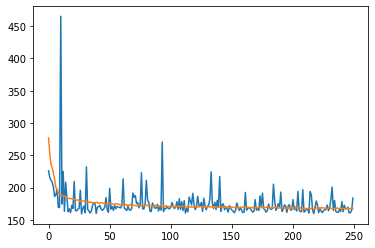

In [14]:
plt.plot(v)
plt.plot(l)

In [15]:
history.history['mean_absolute_error'][-1]

10.077802658081055